Importing necessary modules

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import math
import support_file as sf


Importing the data 

In [15]:
#Allgemeine Ausgabgsdaten 
data = pd.read_csv("Ecommerce Customers.csv")

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

data_cat = data[["Email","Address"]]

#Daten aus Pandas OneHotEncoding - bereinigten & codierten (0/1) Werte 
data_hot_clustering = sf.data_hot_clustering

data_hot_clustering_num_vis=data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]


In [3]:
data_hot_clustering.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State,State group,HIGH,LOW,MEDIUM
0,34.497268,12.655651,39.577668,4.082621,587.951054,MI,MEDIUM,0,0,1
1,31.926272,11.109461,37.268959,2.664034,392.204933,CA,LOW,0,1,0
2,34.305557,13.717514,36.721283,3.120179,581.852344,OH,LOW,0,1,0
3,33.871038,12.026925,34.476878,5.493507,637.102448,MN,HIGH,1,0,0
4,32.021596,11.366348,36.683776,4.685017,521.572175,WV,MEDIUM,0,0,1


New Customer dataframe in regards to YAS 

In [4]:
#Data_Hot_Clustering als Grundlage für customers_yas_list 
#um Yearly Amount Spent als neue Spalte zur Auswertung 


data_hot_clustering_help = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

customers_yas_list = []

for i in data_hot_clustering_help["Yearly Amount Spent"]:
 
    #0-300
    if i < 350 :
        customers_yas_list.append("LOWEST")
    if i < 550: 
        customers_yas_list.append("MIDDLE")
    else:
       customers_yas_list.append("TOP")


customers_yas_series_new = pd.Series(customers_yas_list)

data_hot_clustering_yas_new = pd.concat([data_hot_clustering_help, customers_yas_series_new], axis=1)
            
data_hot_clustering_yas_new.columns = [["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","YASCAT"]]

In [18]:
data_hot_clustering_yas_new.head(5)
data_hot_clustering_num_vis.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   393 non-null    float64
 1   Time on App           393 non-null    float64
 2   Time on Website       393 non-null    float64
 3   Length of Membership  393 non-null    float64
 4   Yearly Amount Spent   393 non-null    float64
dtypes: float64(5)
memory usage: 15.5 KB


Import numerical und categorical variables in one dataframe

Measurement calculator 


In [6]:
#transform inch in cm 
def cm_to_inch(value):
    return value/2.54
cm_to_inch(100)

39.37007874015748

In [7]:
%run pandas_analysis.ipynb

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   393 non-null    float64
 1   Time on App           393 non-null    float64
 2   Time on Website       393 non-null    float64
 3   Length of Membership  393 non-null    float64
 4   Yearly Amount Spent   393 non-null    float64
 5   State                 393 non-null    object 
dtypes: float64(5), object(1)
memory usage: 18.5+ KB
None


DriverError: cb_2016_us_state_5m\cb_2016_us_state_5m.shp: No such file or directory

Univariate visual data analysis 

In [139]:
#Verteilungen numerische 



def distplot(x):
    for i in x:
        fig = plt.figure(2, figsize=(10,5))
        sns.distplot(x[i], kde=True)
        plt.title(i ,fontsize=15)
        plt.show()

distplot(data_hot_clustering_help)

AttributeError: module 'seaborn' has no attribute 'subtitle'

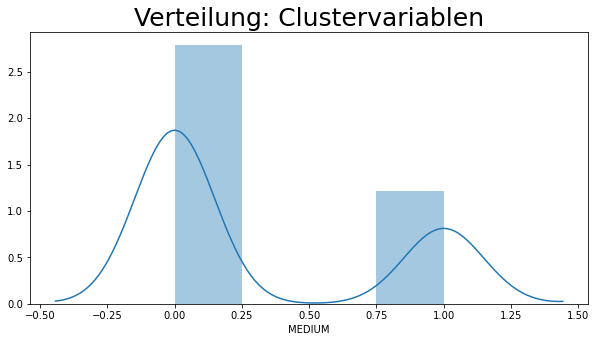

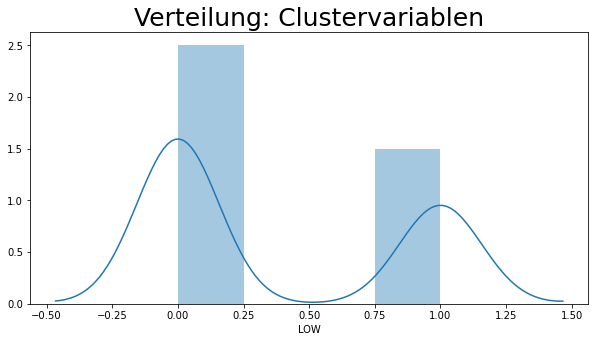

In [29]:
SINNVOL ????ig = plt.figure(3, figsize=(10,5))
sns.distplot(data_hot_clustering["MEDIUM"], kde=True)
plt.title('Verteilung: Clustervariablen', fontsize=25)
plt.show()


fig = plt.figure(3, figsize=(10,5))
sns.distplot(data_hot_clustering["LOW"], kde=True)
plt.title('Verteilung: Clustervariablen', fontsize=25)
plt.show()


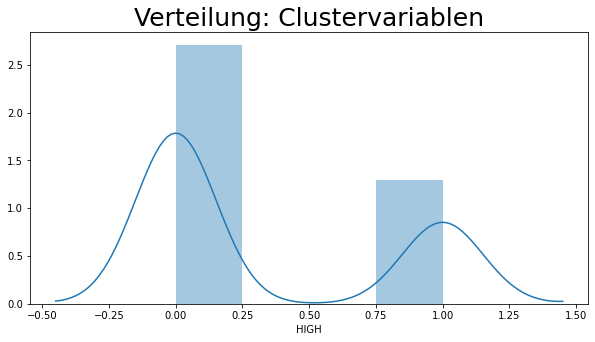

In [30]:

fig = plt.figure(3, figsize=(10,5))
sns.distplot(data_hot_clustering["HIGH"], kde=True)
plt.title('Verteilung: Clustervariablen', fontsize=25)
plt.show()


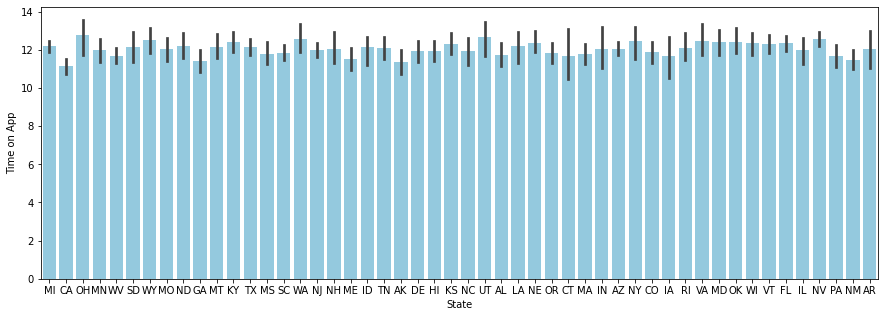

In [29]:
#Balkendiagramm über alle Staaten
fig = plt.figure(2, figsize=(15,5))
ax = fig.add_subplot()
sns.barplot(x=data_mixed['State'], y=data_mixed["Time on App"], color="skyblue")

No handles with labels found to put in legend.


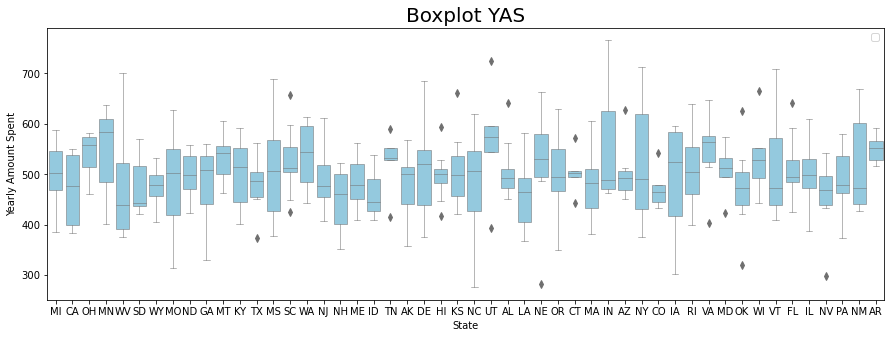

In [31]:
fig = plt.figure(1, figsize=(15,5))
ax = fig.add_subplot()


ax= sns.boxplot(x=data_hot_clustering['State'], y=data_hot_clustering['Yearly Amount Spent'], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=10)
plt.ylabel('Yearly Amount Spent', fontsize=10)
plt.title('Boxplot YAS', fontsize=20)
plt.show()




In [21]:
#x_list

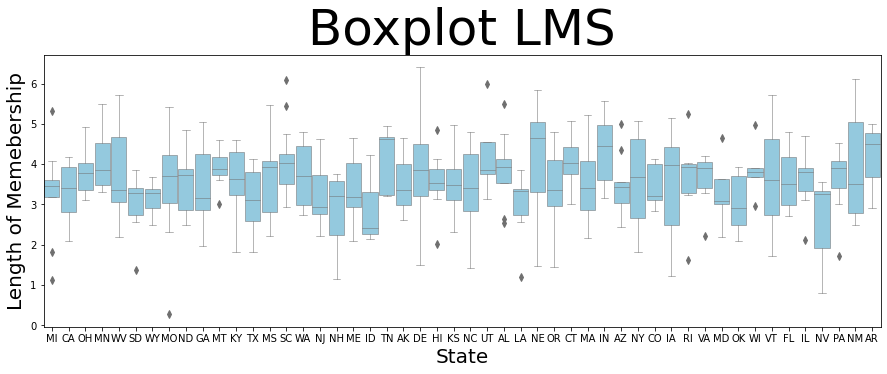

In [53]:
fig = plt.figure(2, figsize=(15,5))
ax = fig.add_subplot()

sns.boxplot(x=data_hot_clustering['State'], y=data_hot_clustering['Length of Membership'],width=0.9, linewidth=0.5, fliersize=5,color="skyblue")
plt.xlabel('State',fontsize=20)
plt.ylabel('Length of Memebership', fontsize=20)
plt.title('Boxplot LMS', fontsize=50)
plt.show()


No handles with labels found to put in legend.


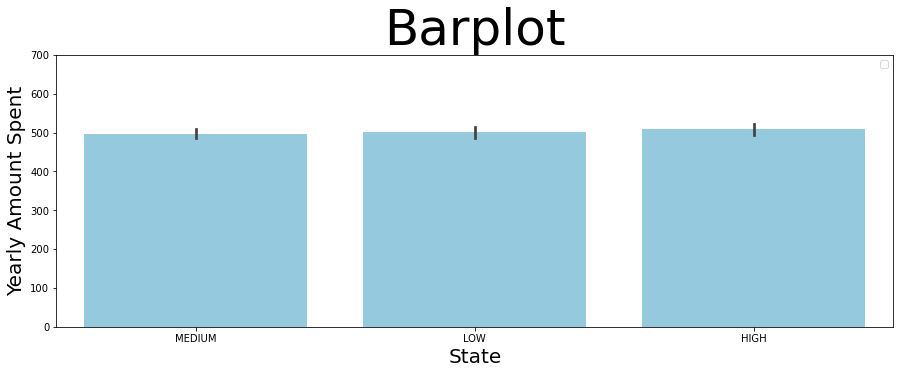

In [91]:
#Balkendiagramm über alle Staaten
fig = plt.figure(5, figsize=(15,5))
ax = fig.add_subplot()

ax= sns.barplot(x=data_hot_clustering['State group'], y=data_hot_clustering['Yearly Amount Spent'], linewidth=0.5, color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Yearly Amount Spent', fontsize=20)
plt.ylim(0,700)
plt.title('Barplot', fontsize=50)
plt.legend() #in Abhängigkeit der Abweichugn zum Median)
plt.show()

No handles with labels found to put in legend.


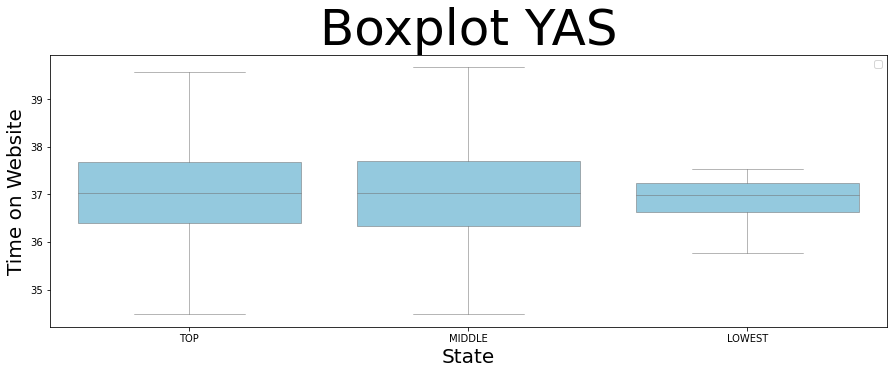

In [58]:
fig = plt.figure(4, figsize=(15,5))
ax = fig.add_subplot()


ax= sns.boxplot(x=data_mixed_yas_new['YAS'], y=data_mixed_yas_new['Time on Website'], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Time on Website', fontsize=20)
plt.title('Boxplot YAS', fontsize=50)
plt.legend() #in abhängigkeit der A bweichugn zum Median)
plt.show()


#Generell Website längere Zeiten: Median bei 37
#In den _Bundestatten in denen weniger Kunden sind -> Median geringer und 50% der Kunden sind in kürzer Zeitspanne auf Website; Zusammenhang? Umkehrschluss: in den Bundestaaten in denen wir mehr Kunden haben sind 50% der Kunden auch länger auf der Website SIEHE VERGLEICH ZU TIME ON APP

In [ ]:
fig = plt.figure(5, figsize=(15,5))
ax = fig.add_subplot()

ax= sns.barplot(x=, y=data_hot_clustering['Yearly Amount Spent'], linewidth=0.5, color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Yearly Amount Spent', fontsize=20)
plt.ylim(0,700)
plt.title('Barplot', fontsize=50)
plt.legend() #in Abhängigkeit der Abweichugn zum Median)
plt.show()

Multivariate visual data analysis 

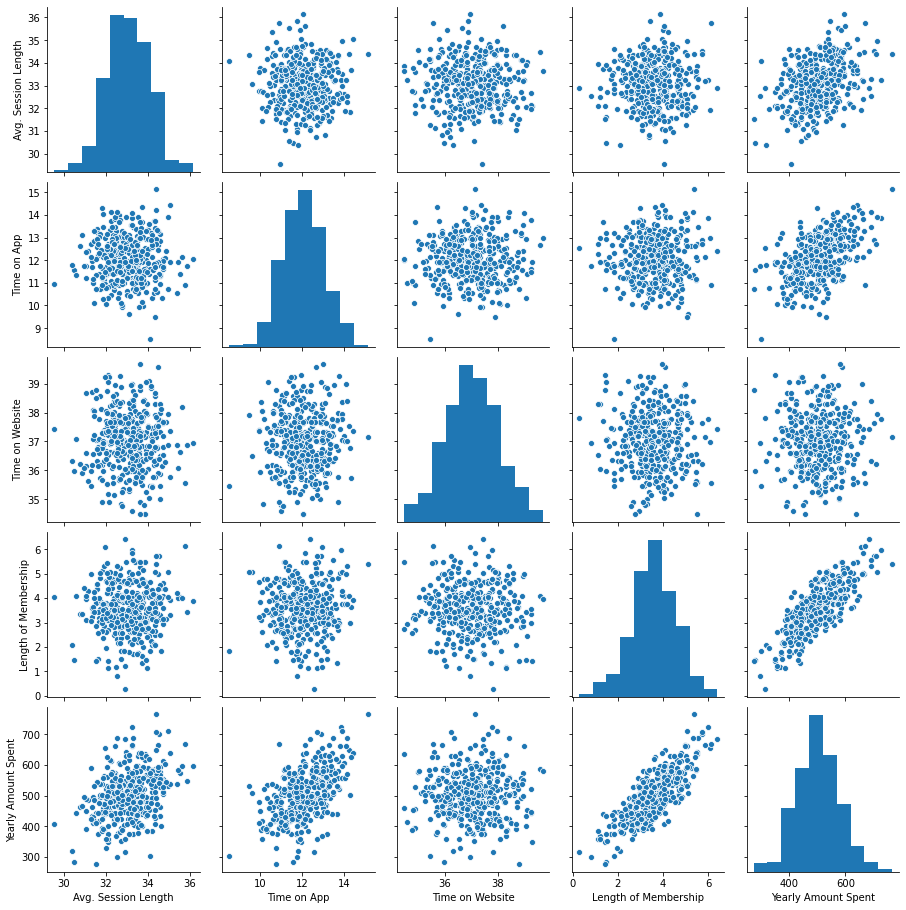

In [60]:
# Overviewing relationships across the entire data frame 
def pairplot_def(x):
    sns.pairplot(x)
    plt.show()

pairplot_def(data_hot_clustering_num_vis)

 Bivariate visual data analysis 

In [ ]:
#Aufteilung der Variablen in zwei Blöcke (A&B)
#A="Avg. Session Length","Time on App","Time on Website" ähnliche Aussage
#B="Length of Membership","Yearly Amount Spent" Unterschiedliche Aussage

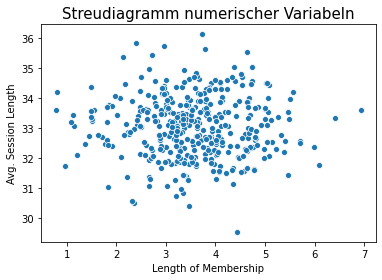

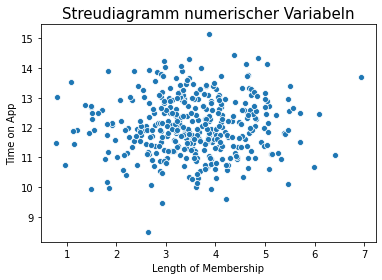

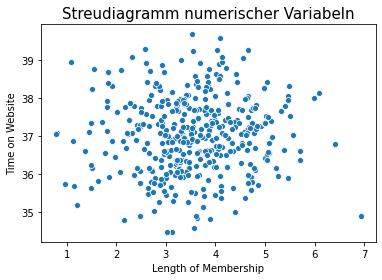

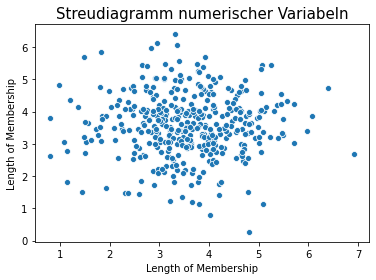

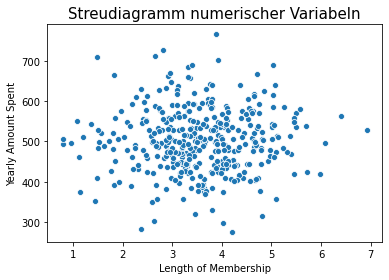

In [25]:
#Scatterplot Block A zu zu "Length of Membership"
def scatter (x):
    plt.figure()
    for i in x:
        sns.scatterplot(x=data_num["Length of Membership"], y=i, data=x)
        plt.title('Streudiagramm numerischer Variabeln', fontsize=15)
        sns.set_style=("dark")
        plt.show()

scatter(data_hot_clustering_num_vis)



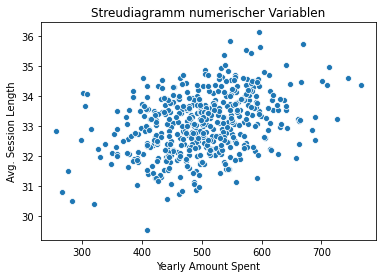

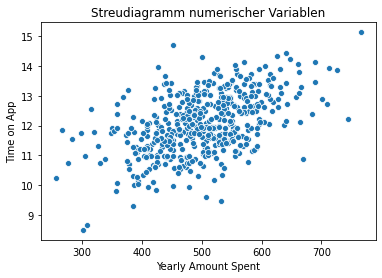

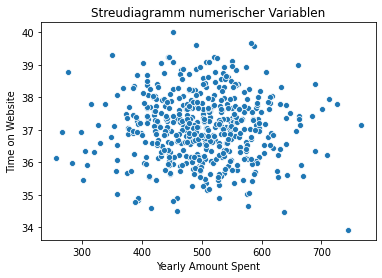

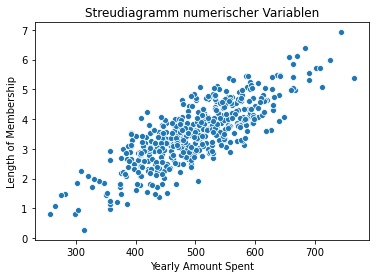

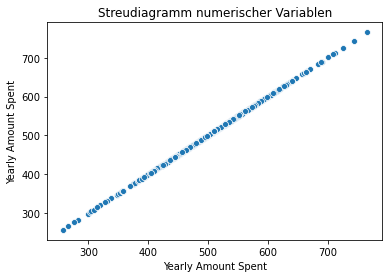

In [24]:
#Scatterplot numerischer V zu "Yearly Amount Spent"
def scatter2 (x):
    for i in x:
        sns.scatterplot(x=data_num["Yearly Amount Spent"], y=i, data=data)
        sns.set_style=("dark")
        plt.title('Streudiagramm numerischer Variablen')
        plt.show()

scatter2(data_hot_clustering_num_vis)